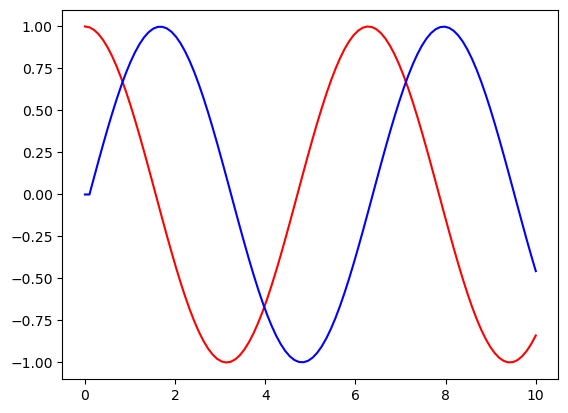

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): 
    return np.cos(x)

xi = np.linspace(0,10,100)
integ = np.trapz(f(xi), xi)

def integral(x): 
    return np.trapz(f(xi[:x]), xi[:x])

integ_v = [integral(i) for i in range(100)]
plt.plot(xi,f(xi), color="red")
plt.plot(xi, integ_v, color="blue")



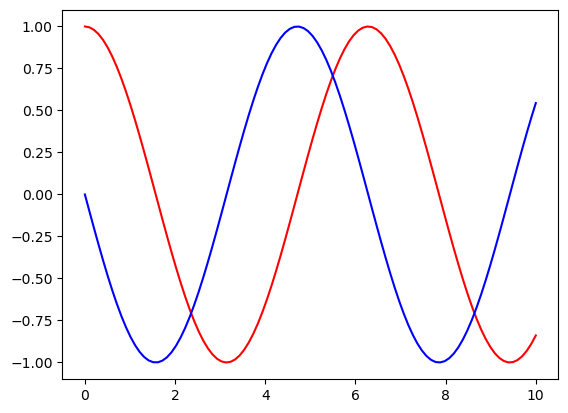

In [4]:
#derivada centrada general: 

def df(x,f, h =0.001): 
    return (f(x+h)-f(x-h))/(2*h)
plt.plot(xi,f(xi), color="red")
plt.plot(xi, df(xi,f), color="blue")

In [5]:
#integral general dependiendo de la regla
def simp(f, a, b): #definicion regla de simpson
    simpson = ((b-a)/6)*(f(a) + 4*f((a+b)*0.5) + f(b))
    return simpson
def trap(f, a, b): #definicion regla del trapezoide
    return ((b-a)*(f(a)+f(b)))*0.5

def pmed(f,a,b): #definicion regla del punto medio
    return (b-a)*f((b+a)*0.5)

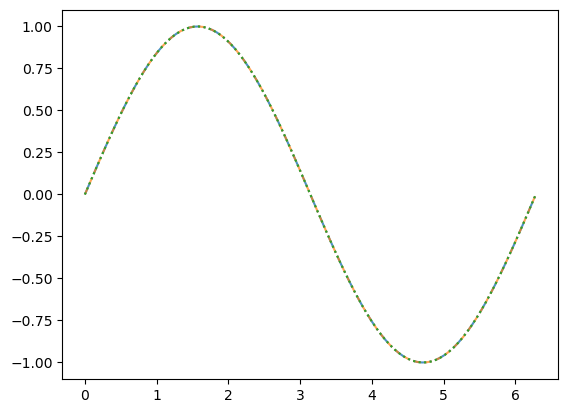

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
#definicion de la integral con el intervalo 
def integ(f,a,x,g): #definimos la funcion a integrar, limite inferior, x, tecnica d integracion
    intervalos = np.linspace(a,x,10000) #intervalos de integracion
    integ = 0.0 
    for i in range(len(intervalos)-1): 
        integ +=  g(f, intervalos[i], intervalos[i+1]) #en cada intervalito se hace la regla para que se más preciso 
    return integ 
# si nos dan la funcion y un intervalo, x = b 

q = lambda x: np.cos(x)

q_integral = lambda x,g: integ(q,0, x,g)

xi = np.linspace(0, 2*np.pi, 100)
plt.plot(xi, q_integral(xi,simp), linestyle='-.', alpha= 0.8)
plt.plot(xi, q_integral(xi,pmed), alpha=0.7, linestyle='--')
plt.plot(xi, q_integral(xi,trap), linestyle=':')     
#se ve como los tres coinciden 

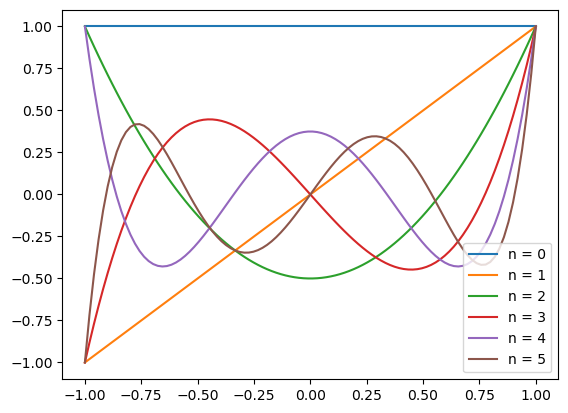

In [ ]:
#también se podrá integrar con: 
import numpy as np 
import matplotlib.pyplot as plt 
def P(x,n): #si se quiere al O como "funcion" sino se agrega la variable y abajo envez de 2pi se reemplaza con el O 
    O = np.linspace(0, 2*np.pi, 100) #estos son los nodos de la funcion a integrar, se tiene a y b conocidos
    dx = O[1] - O[0] #dx constante, por linspace
    #si no fuese constante : dx = np.diff(O) (1)
    f = (x+1j*np.cos(O)*np.sqrt(1-x**2))**n #funcion con cositas 
    suma = f[0] + 2*np.sum(f[1:-1]) + f[-1] #nueva integral
    #(1) y aca habría que usar la regla explicita(la q yo estaba usando)
    return np.real(dx*0.25*suma/np.pi)

x = np.linspace(-1,1, 100)
for n in range(6): 
    p = [P(xi, n=n) for xi in x]
    plt.plot(x, p, label = f'n = {n}')
    plt.legend()
plt.show()